In [1]:
import pandas as pd
import numpy as np

In [2]:
algo = pd.read_csv("a.csv", index_col=0, parse_dates=True)["0"]
df = pd.read_csv("prices_and_features.csv", index_col=0, parse_dates=True)
turb = df[df.columns[-1]]
turb

Date
2006-03-16    23.222291
2006-03-17    35.728204
2006-03-20    36.099613
2006-03-21    23.405654
2006-03-22    22.328389
                ...    
2023-11-01    52.086731
2023-11-02    20.946097
2023-11-03    20.295762
2023-11-06    22.607701
2023-11-07     9.334827
Name: TURB, Length: 4443, dtype: float64

<Axes: xlabel='Date'>

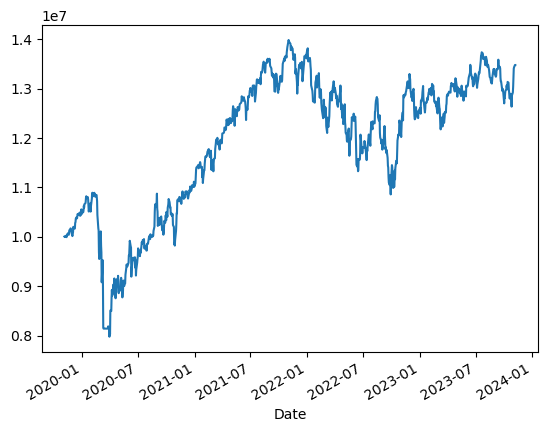

In [3]:
algo.plot()

<Axes: xlabel='Date'>

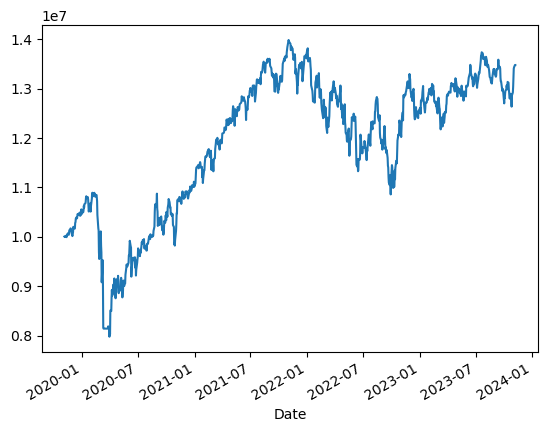

In [4]:
algo.plot()

In [5]:
import yfinance as yf

dji = yf.download("^DJI", start=algo.index.min(), end=algo.index.max()+pd.DateOffset(days=1))["Adj Close"]

[*********************100%%**********************]  1 of 1 completed


<Axes: xlabel='Date'>

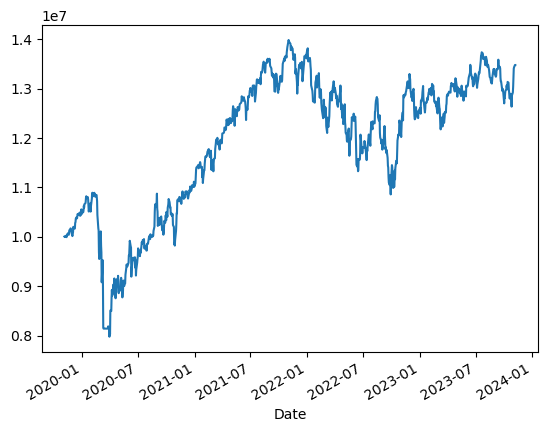

In [6]:
algo.plot()

In [7]:
algo

Date
2019-11-06    1.000489e+07
2019-11-07    1.001089e+07
2019-11-08    9.994232e+06
2019-11-11    1.000582e+07
2019-11-12    1.001323e+07
                  ...     
2023-11-01    1.323638e+07
2023-11-02    1.340508e+07
2023-11-03    1.343316e+07
2023-11-06    1.347812e+07
2023-11-07    1.347812e+07
Name: 0, Length: 1008, dtype: float64

<Axes: xlabel='Date'>

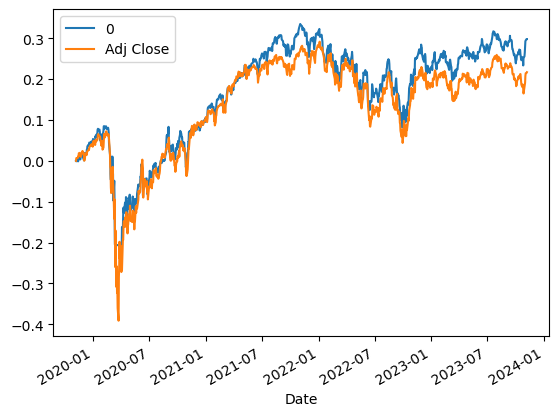

In [8]:
bt = pd.concat([algo, dji], axis=1)
lr = np.log(bt).diff()
lr.loc[lr.index.min()] = 0
lr.cumsum().plot()

<Axes: xlabel='Date'>

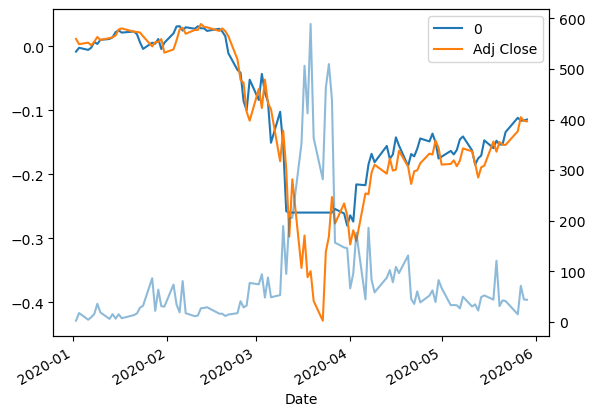

In [9]:
ax = lr.loc["2020-01":"2020-05"].cumsum().plot()
turb.reindex(lr.index)["2020-01":"2020-05"].plot(ax=ax.twinx(), alpha=.5)

In [8]:
lr.cumsum()

,0,Adj Close
Date,,
2016-10-14,0.000000,0.000000
2016-10-17,0.001420,-0.002870
2016-10-18,0.001699,0.001298
2016-10-19,0.001533,0.003535
2016-10-20,0.001442,0.001321
...,...,...
2023-11-01,0.952071,0.606764
2023-11-02,0.952715,0.623586
2023-11-03,0.956259,0.630132


In [9]:
algo

Date
2016-10-14    9.995647e+06
2016-10-17    1.000985e+07
2016-10-18    1.001264e+07
2016-10-19    1.001098e+07
2016-10-20    1.001007e+07
                  ...     
2023-11-01    2.589943e+07
2023-11-02    2.591612e+07
2023-11-03    2.600813e+07
2023-11-06    2.618496e+07
2023-11-07    2.618496e+07
Name: 0, Length: 1778, dtype: float64